# 1. Подготовка данных

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
sns.set(style="whitegrid")
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from lightgbm import LGBMRegressor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

rnd_state = 702

### 1.1. Изучение данных.

Изучим данные, предоставленные для проекта. Создадим вспомогательный словарь из датафреймов для удобства обращения.

Выведем на экран первые 3 строки каждого датафрейма.

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

df_dict = {'Train' : df_train, 'Test' : df_test, 'Full' : df_full}

for df in df_dict:
    print('Датафрейм:', df)
    display(df_dict[df].head(3))
    print()

Датафрейм: Train


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363



Датафрейм: Test


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559



Датафрейм: Full


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


Датафреймы `Train` и `Full` включают в себя 87 признаков, в датафрейме `Test` признаков меньше - только 53. Отсутствующие признаки мы проанализируем позже. Выведем на экран общую информацию по всем датафреймам.

In [3]:
for df in df_dict:
    print('Датафрейм:', df)
    display(df_dict[df].info())

Датафрейм: Train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depres

None

Датафрейм: Test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null fl

None

Датафрейм: Full
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depress

None

Как мы видим, в данных содержатся пропуски. В каждом признаке их не так много, но, возможно, у разных наблюдений пропуски присутствуют в разных признаках. Посмотрим, сколько в каждом датафрейме наблюдений с пропусками.

In [4]:
for df in df_dict:
    print('Датафрейм:', df)
    df_size = df_dict[df].shape[0]
    na_dropped_df_size = df_dict[df].dropna().shape[0]
    print('Процентное содержание наблюдений с пропусками: {:.2%}'
          .format(1 - na_dropped_df_size / df_size))
    print()

Датафрейм: Train
Процентное содержание наблюдений с пропусками: 34.66%

Датафрейм: Test
Процентное содержание наблюдений с пропусками: 8.08%

Датафрейм: Full
Процентное содержание наблюдений с пропусками: 29.15%



В `Train` и `Full` около трети наблюдений с пропусками, удалять пропуски из всего датафрейма не будем. При необходимости, пропуски будем обрабатывать только в признаках, с которыми работаем.

### 1.2. Проверка расчета эффективности обогащения.

Проверим, правильно ли рассчитана эффективность обогащения в обучающей выборке. Для этого возьмем из обучающей выборки признак `rougher.output.recovery`, а также посчитаем эффективность обогащения через известные параметры для этапа флотации: `input.feed_au`, `output.concentrate_au` и `output.tail_au`.

Предварительно напишем функцию для расчета эффективности обогащения и удалим пропущенные значения в столбце `rougher.output.recovery` и в тех, по которым будем сами считать эффективность.

In [5]:
def recovery(feed, conc, tail):
    """ Функция рассчитывает эффективность обогащения
        feed - доля в концентрате до очистки
        conc - доля в концентрате после очистки
        tail - доля в отвальных хвостах после очистки
    """
    recovery = conc * (feed - tail) / (feed * (conc - tail))
    return recovery

train = df_train.dropna(subset = ['rougher.output.recovery',
                                  'rougher.input.feed_au',
                                  'rougher.output.concentrate_au',
                                  'rougher.output.tail_au'])

In [6]:
feed = train['rougher.input.feed_au']
conc = train['rougher.output.concentrate_au']
tail = train['rougher.output.tail_au']

recovery_train = train['rougher.output.recovery']
recovery_calculated = recovery(feed, conc, tail) * 100

print('MAE между расчётами и значением признака: {:.4f}'
      .format(mean_absolute_error(recovery_train, recovery_calculated)))

MAE между расчётами и значением признака: 0.0000


MAE между нашими расчётами и значением признака равна 0, следовательно значение признака в обучающей выборке посчитано верно.

### 1.3. Анализ признаков, недоступных в тестовой выборке.

Найдем те признаки в `df_train`, которые недоступны в тестовой выборке.

In [7]:
set(df_train.columns) - set(df_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Все эти признаки можно разделить на следующие группы:
1. Параметры продукта на разных этапах (концентраты и хвосты) - (`output`). При этом параметры даны для различных веществ.
2. Расчетные характеристики для этапа флотации (`calculation`).
3. Признаки, которые мы должны спрогнозировать (`recovery`).

Эти параметры недоступны в тестовой выборке, так как, скорее всего, все они замеряются/рассчитываются уже после завершения этапа, а не во время выполнения технологического процесса. Так как в трестовой выборке этих признаков нет, мы не сможешь использовать их для обучения модели. Удалим эти признаки из обучающей выборки в процессе предобработки данных.

### 1.4. Предобработка данных.

Для будущей проверки модели на тестовой выборке нам понадобятся истинные значения целевых признаков `rougher.output.recovery` и `final.output.recovery`, которых сейчас нет в тестовой выборке. Для этого добавим целевые признаки из исходных данных в тестовую выборку по ключу `date`.

In [8]:
df_test = (df_test.join(df_full[['date', 'rougher.output.recovery', 'final.output.recovery']]
                                .set_index('date'), on='date'))

В данных содержится много пропусков, но наблюдения отсортированы по времени и мы можем предположить, что параметры у соседних наблюдений сильно не отличаются. Обработаем пропуски следующим образом:

1. Пропуски в обучающих данных заполним с помощью `fillna`, используя при этом метод `method='ffill'` - пропуски будут заполнены соответствующим параметром предыдущего наблюдения.
2. Пропуски в тестовых данных удалим, чтобы синтетические значения не влияли на итоговую точность модели.

In [9]:
df_train = df_train.fillna(method='ffill')
df_test = df_test.dropna()

# 2. Анализ данных

### 2.1. Концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Всего у нас должно быть четыре хакатеристики для каждого из металлов:
1. Сырье до флотации
2. Концентрат после флотации (черновой концентрат)
3. Концентрат после первой очистки
4. Концентрат после второй очистки (финальный концентрат)

Проверим, так ли это. Из всех признаков выберем те, которые относятся к каждому из металлов. Характеристики отвальных хвостов и расчетные характеристики нас не интересуют, их мы исключим.

In [10]:
metal_list = ('au', 'ag', 'pb')
tail_calculation_cols = {col for col in df_full.columns if 'tail' in col or 'calculation' in col}
trimmed_cols = set(df_full.columns) - tail_calculation_cols

for metal in metal_list:
    print('Этапы очистки для ' + metal + ':', '\n')
    print(*[col for col in trimmed_cols if metal in col], sep = '\n')
    print('-' * 40)

Этапы очистки для au: 

rougher.input.feed_au
final.output.concentrate_au
primary_cleaner.output.concentrate_au
rougher.output.concentrate_au
----------------------------------------
Этапы очистки для ag: 

final.output.concentrate_ag
primary_cleaner.output.concentrate_ag
rougher.input.feed_ag
rougher.output.concentrate_ag
----------------------------------------
Этапы очистки для pb: 

final.output.concentrate_pb
rougher.output.concentrate_pb
rougher.input.feed_pb
primary_cleaner.output.concentrate_pb
----------------------------------------


Наши предположения подтвердились, у нас есть 4 характеристики разных этапов для каждого металла. Построим гистограммы этих характеристик и проанализируем их. Также создадим вспомогательный словарь для этапов очистки.

In [11]:
stage_dict = {'rougher.input.feed' : 'Сырье до флотации', 
              'rougher.output.concentrate' : 'Концентрат после флотации',
              'primary_cleaner.output.concentrate' : 'Концентрат после первой очистки', 
              'final.output.concentrate': 'Финальный концентрат'}

def show_histograms(metal, threshold = -1):
    """ Функция строит гистограммы характеристик каждого из 4 этапов очистки
        для металла metal. Для улучшения визуализации можно задать порог threshold,
        который отсечет в гистограммах значения ниже порога.
    """
    print('Металл:', metal)
    for stage in stage_dict:
        series = df_full[stage + '_' + metal]
        series = series[series > threshold]
        ax = sns.distplot(series, bins = 100, label = stage_dict[stage])
        print(stage_dict[stage] + ': {:.2f}'.format(series.mean()))
    ax.set_xlabel('Доля металла, %')
    ax.legend()
    plt.show()

Металл: au
Сырье до флотации: 8.26
Концентрат после флотации: 20.00
Концентрат после первой очистки: 32.28
Финальный концентрат: 43.90


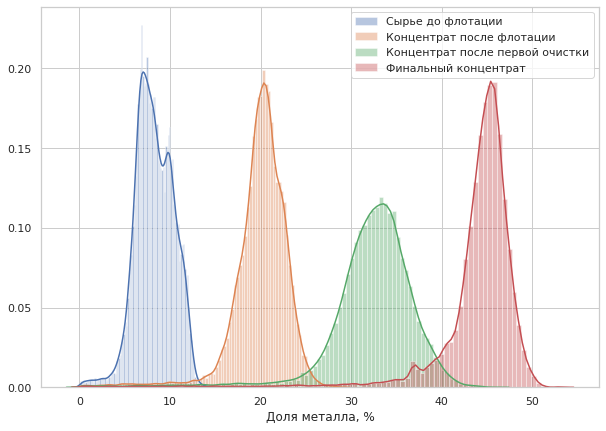

Металл: ag
Сырье до флотации: 8.80
Концентрат после флотации: 12.16
Концентрат после первой очистки: 8.50
Финальный концентрат: 5.25


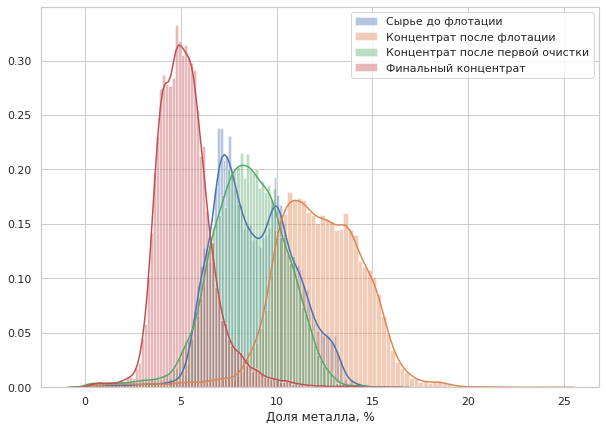

Металл: pb
Сырье до флотации: 3.61
Концентрат после флотации: 7.72
Концентрат после первой очистки: 9.88
Финальный концентрат: 9.98


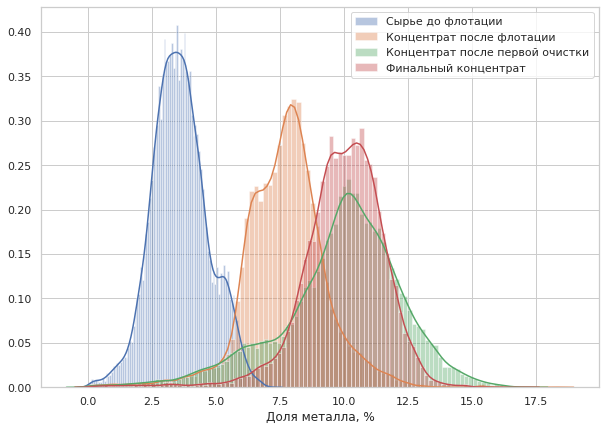

In [12]:
for metal in metal_list:
    show_histograms(metal, 0.05)

Мы видим, что доля золота увеличивается на каждом этапе. Это означает, что процесс восстановления золота работает: средняя доля золота увеличивается с 8.26 до 43.90 в финальном концентрате.
Доля свинца также увеличивается на каждом этапе, кроме второй очистки - доля в концентрате после первой очистки и после второй практически не отличается.
Для серебра такая зависимость не наблюдается. На этапе флотации доля серебра растет, а на последующих этапах падает. При этом доля серебра в финальном концентрате даже ниже, чем в сырье до флотации.

### 2.2.  Распределения размеров гранул сырья на обучающей и тестовой выборках.

Проверим распределения размеров гранул сырья на обучающей и тестовой выборках. Рассмотрим сырье перед этапом флотации и перед  первым этапом очистки. Также создадим вспомогательную функцию для отображения урезанных гистограмм.

In [13]:
def clipped_histogram(df, column, lower = None, upper = None):
    """ Функция строит гистограмму признака column датафрейма df
        при этом отсекая значения ниже lower и выше upper.
    """
    lower = lower or df[column].min()
    upper = upper or df[column].max()
    ax = sns.distplot(df.loc[(df[column] > lower) & (df[column] < upper), column], bins = 100)
    ax.set_xlabel('Размер гранул сырья')
    return ax

Посмотрим отдельно на распределения размеров для разных этапов. Для каждого этапа совместим гистограммы обучающей и тестовой выборок.

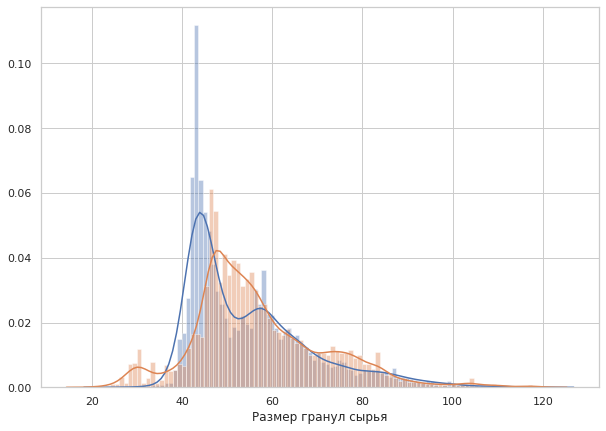

In [14]:
ax = clipped_histogram(df_test, 'rougher.input.feed_size', 20, 120)
ax = clipped_histogram(df_train, 'rougher.input.feed_size', 20, 120)
plt.show()

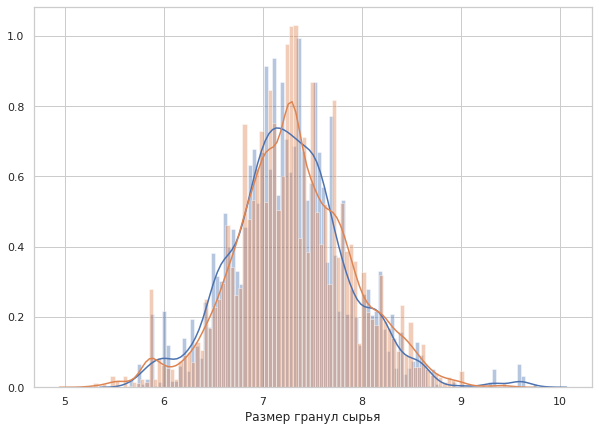

In [15]:
ax = clipped_histogram(df_test, 'primary_cleaner.input.feed_size', 5, 10)
ax = clipped_histogram(df_train, 'primary_cleaner.input.feed_size', 5, 10)
plt.show()

Размеры гранул сырья для первого этапа очистки меньше, чем для этапа флотации, но самое главное, что на обучающей и тестовой выборках распределения размеров совпадают. Оценка модели должна быть правильной.

### 2.3.  Суммарная концентрация всех веществ на разных стадиях.

Проанализируем суммарную концентрацию всех веществ на разных стадиях. Для обучающей выборки доступны данные по всем четырем стадиям, для тестовой выборки - только стадия сырья до флотации.

In [16]:
def show_overall_histogram(df, stage):
    """ Функция строит гистограммы суммарной концентрации веществ
        для этапов очистки stage выборки df.
    """
    overall = (df[stage + '_ag']
               + df[stage + '_pb']
               + df[stage + '_sol']
               + df[stage + '_au'])
    ax = sns.distplot(overall, bins = 100)
    ax.set_xlabel('Суммарная концентрация веществ, %')
    plt.show()

Обучающая выборка, этап очистки: Сырье до флотации


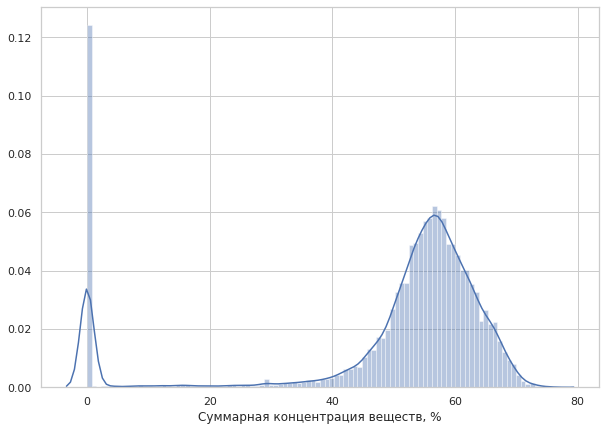

Обучающая выборка, этап очистки: Концентрат после флотации


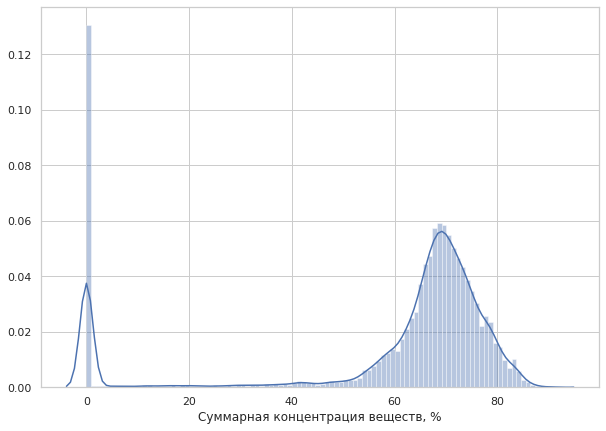

Обучающая выборка, этап очистки: Концентрат после первой очистки


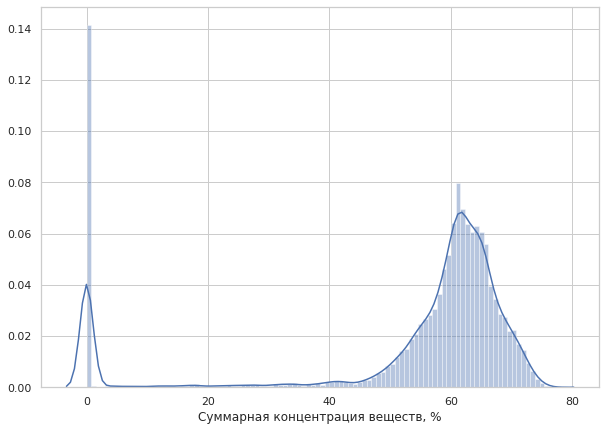

Обучающая выборка, этап очистки: Финальный концентрат


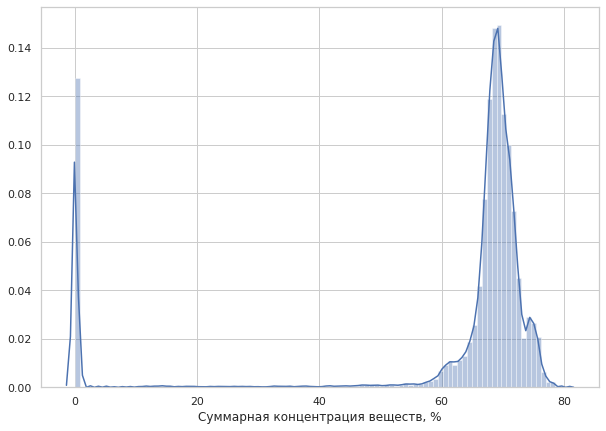

Тестовая выборка, этап очистки: Сырье до флотации


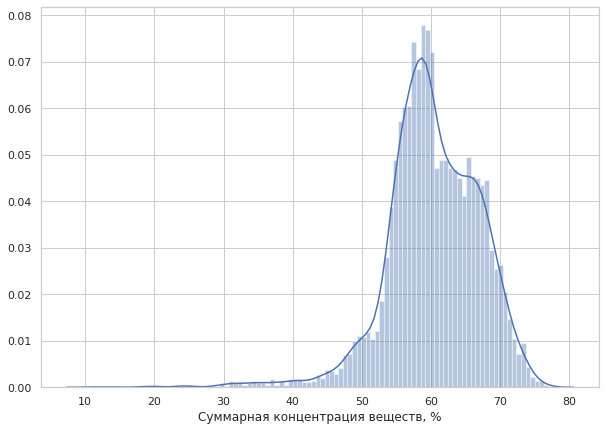

In [17]:
for stage in stage_dict:
    print('Обучающая выборка, этап очистки:', stage_dict[stage])
    show_overall_histogram(df_train, stage)
    
print('Тестовая выборка, этап очистки: Сырье до флотации')
show_overall_histogram(df_test, 'rougher.input.feed')

Как мы видим, на всех этапах очистки существуют пики нулевых значений концентрации веществ. Так как отрицательных концентраций у нас нет, то это означает, что концентрация каждого вещества по отдельности в этом случае тоже нулевая. Это может быть связано  с ошибкой измерения, либо измеряемое сырье действительно не содержало металлов. Посмотрим на концентрации веществ до и после флотации.

In [18]:
overall_rougher_cols = ['rougher.input.feed_ag', 
                        'rougher.input.feed_pb', 
                        'rougher.input.feed_sol', 
                        'rougher.input.feed_au',
                        'rougher.output.concentrate_ag',
                        'rougher.output.concentrate_pb',
                        'rougher.output.concentrate_sol',
                        'rougher.output.concentrate_au',
                        'rougher.output.recovery']

overall_rougher_input = (df_full['rougher.input.feed_ag']
                         + df_full['rougher.input.feed_pb']
                         + df_full['rougher.input.feed_sol']
                         + df_full['rougher.input.feed_au'])

df_full[overall_rougher_input < 1][overall_rougher_cols].sample(n=15, random_state = rnd_state)

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery
6064,0.00,0.00,0.00,0.00,0.000000,0.000,0.00,0.000000,NaN
4106,0.00,0.00,0.00,0.00,0.000000,0.000,0.00,0.000000,NaN
11665,0.00,0.00,0.00,0.00,0.000000,0.000,0.00,0.000000,NaN
4958,0.00,0.00,0.00,0.00,0.000000,0.000,0.00,0.000000,NaN
20457,0.01,0.01,0.01,0.01,0.010000,0.010,0.01,0.010000,NaN
11648,0.00,0.00,0.00,0.00,0.000000,0.000,0.00,0.000000,NaN
4089,0.00,0.00,0.00,0.00,0.000000,0.000,0.00,0.000000,NaN
4105,0.00,0.00,0.00,0.00,0.000000,0.000,0.00,0.000000,NaN
10487,0.00,0.00,0.00,0.00,0.000000,0.000,0.00,0.000000,NaN
11867,0.00,0.00,0.00,0.00,0.000000,0.000,0.00,0.000000,NaN


В большинстве случаев концентрации веществ до флотации и после флотации равны нулю. Похоже, что сырье в этом случае действительно было "пустым". Но есть и наблюдения, когда до флотации концентрация была нулевая, а после - нет. Скорее всего это говорит об ошибке в измерениях.

В любом случае, нулевая доля золота при расчете эффективности обогащения приведет к ошибке, поэтому эти наблюдения удалим из обеих выборок. Так как в обучении модели участвуют только концентрации на этапе сырья до флотации, то удалять наблюдения будем при нулевом признаке `'rougher.input.feed_au'`.

Также удалим другие наблюдения с нулевыми значениями перечисленных признаков из обучающей и тестовой выборок.

In [19]:
cols_for_preprocessing = ['rougher.input.feed_ag',
                          'rougher.input.feed_pb',
                          'rougher.input.feed_rate',
                          'rougher.input.feed_size',
                          'rougher.input.feed_sol',
                          'rougher.input.feed_au',
                          'rougher.output.recovery',
                          'final.output.recovery']

# возьмем порог 0.05, чтобы также отсеять наблюдения со значениями, близкими к нулю

thresh = 0.05

for col in cols_for_preprocessing:
    df_train = df_train.loc[df_train[col] > thresh]
    df_test = df_test.loc[df_test[col] > thresh]

# 3. Модель

### 3.1. Функция для вычисления итоговой sMAPE.

Напишем две функции для вычисления sMAPE. Одна - базовая функция, другая считает итоговое значение sMAPE.

In [20]:
def smape(y_true, y_pred):
    """ Функция рассчитывает метрику качества sMAPE
        y_true - истинные значения
        y_pred - предсказания  
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    if len(y_true) != len(y_pred):
        raise ValueError("Разная длина массивов y_true и y_pred")
    n_sum = 0
    for i in range(len(y_true)):
        # если (|y_true| + |y_pred| = 0), то возникнет неопределенность
        # в этом случае n = 0 и n_sum не изменится
        if y_true[i] != 0 or y_pred[i] != 0: 
            n = 2 * np.abs(y_true[i] - y_pred[i]) / (np.abs(y_true[i]) + np.abs(y_pred[i]))
            n_sum += n
    smape = n_sum / len(y_true)
    return smape

def final_smape(rougher_true, rougher_pred, final_true, final_pred):
    output = 0.25 * smape(rougher_true, rougher_pred) + 0.75 * smape(final_true, final_pred)
    return output

В тестовой выборке находятся параметры сырья для различных этапов и параметры, характеризующие текущее состояние этапа. Логично предположить, что на эффективность обогащения чернового концентрата не влияют параметры, относящиеся к более поздним этапам. Поэтому для прогнозирования `rougher.output.recovery` будем использовать только признаки этапа `rougher`, а для прогнозирования `final.output.recovery` будем использовать все признаки из тестовой выборки. Дату мы исключим, так как она не влияет на прогнозирование целевых признаков.

Также сохраним истинные значения целевых признаков `rougher.output.recovery` и `final.output.recovery` в соответствующих переменных.

In [21]:
cols_to_drop = ['date', 'rougher.output.recovery', 'final.output.recovery']

rougher_recovery_cols = [col for col in df_test.columns if 'rougher' in col and col not in cols_to_drop]
final_recovery_cols = [col for col in df_test.columns if col not in cols_to_drop]

rougher_recovery_features = df_train[rougher_recovery_cols]
rougher_recovery_target = df_train['rougher.output.recovery']
rougher_recovery_test = df_test['rougher.output.recovery']

final_recovery_features = df_train[final_recovery_cols]
final_recovery_target = df_train['final.output.recovery']
final_recovery_test = df_test['final.output.recovery']

### 3.2. Обучение моделей.

Обучим разные модели и оценим их качество кросс-валидацией. В качестве метрики выберем метрику sMAPE. Проверим модели `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor` и `LGBMRegressor`. Для двух прогнозируемых признаков обучим разные модели, обучающие выборки также будут отличаться.

In [22]:
smape_scorer = make_scorer(smape) # создадим новую метрику для использования в качестве оценки модели

Создадим функцию для вывода результатов кросс-валидации для разных моделей.

In [23]:
def cv_result(model, features, target, model_name, scoring=smape_scorer, cv=5):
    cvs = cross_val_score(model, features, target,
                          scoring = scoring, cv=cv)
    print('Модель:', model_name)
    print('Значения метрики при кросс-валидации:', cvs)
    print('Cреднее значение метрики при кросс-валидации: {:.3f}'.format(cvs.mean()))

Проверим модели для прогнозирования `'rougher.output.recovery'`.

In [24]:
cv_result(LinearRegression(), 
          rougher_recovery_features, rougher_recovery_target, 
          'LinearRegression')

Модель: LinearRegression
Значения метрики при кросс-валидации: [0.08781951 0.07969228 0.0497999  0.04679056 0.0910159 ]
Cреднее значение метрики при кросс-валидации: 0.071


In [25]:
cv_result(DecisionTreeRegressor(random_state=rnd_state), 
          rougher_recovery_features, rougher_recovery_target,
          'DecisionTreeRegressor')

Модель: DecisionTreeRegressor
Значения метрики при кросс-валидации: [0.14212268 0.11389253 0.12151418 0.07502293 0.10220878]
Cреднее значение метрики при кросс-валидации: 0.111


In [26]:
cv_result(RandomForestRegressor(n_estimators = 100, random_state=rnd_state), 
          rougher_recovery_features, rougher_recovery_target,
          'RandomForestRegressor')

Модель: RandomForestRegressor
Значения метрики при кросс-валидации: [0.09280754 0.07489259 0.06601697 0.04733195 0.08337776]
Cреднее значение метрики при кросс-валидации: 0.073


In [27]:
cv_result(LGBMRegressor(random_state=rnd_state), 
          rougher_recovery_features, rougher_recovery_target,
          'LGBMRegressor')

Модель: LGBMRegressor
Значения метрики при кросс-валидации: [0.09293696 0.07081214 0.06155322 0.04346312 0.08295782]
Cреднее значение метрики при кросс-валидации: 0.070


Теперь проверим модели для прогнозирования `'final.output.recovery'`.

In [28]:
cv_result(LinearRegression(), 
          final_recovery_features, final_recovery_target,
          'LinearRegression')

Модель: LinearRegression
Значения метрики при кросс-валидации: [0.1393681  0.09897381 0.09866278 0.09725923 0.15227124]
Cреднее значение метрики при кросс-валидации: 0.117


In [29]:
cv_result(DecisionTreeRegressor(random_state=rnd_state), 
          final_recovery_features, final_recovery_target,
          'DecisionTreeRegressor')

Модель: DecisionTreeRegressor
Значения метрики при кросс-валидации: [0.18944225 0.19489049 0.14892699 0.14547087 0.17996063]
Cреднее значение метрики при кросс-валидации: 0.172


In [30]:
cv_result(RandomForestRegressor(n_estimators = 100, random_state=rnd_state), 
          final_recovery_features, final_recovery_target,
          'RandomForestRegressor')

Модель: RandomForestRegressor
Значения метрики при кросс-валидации: [0.11093629 0.10384947 0.09527496 0.09236021 0.11236267]
Cреднее значение метрики при кросс-валидации: 0.103


In [31]:
cv_result(LGBMRegressor(random_state=rnd_state), 
          final_recovery_features, final_recovery_target,
          'LGBMRegressor')

Модель: LGBMRegressor
Значения метрики при кросс-валидации: [0.11378946 0.1347285  0.09878039 0.09639493 0.11763824]
Cреднее значение метрики при кросс-валидации: 0.112


Лучший результат по двум этапам показала модель градиентного бустинга от LightGBM. Используем её для предсказания признака в тестовой выборке.

In [32]:
model_rougher = LGBMRegressor(random_state=rnd_state)
model_rougher.fit(rougher_recovery_features, rougher_recovery_target)

rougher_recovery_pred = model_rougher.predict(df_test[rougher_recovery_cols])
print('Значения метрики sMAPE при предсказании "rougher.output.recovery": {:.4f}'
      .format(smape(rougher_recovery_test, rougher_recovery_pred)))

model_final = LGBMRegressor(random_state=rnd_state)
model_final.fit(final_recovery_features, final_recovery_target)

final_recovery_pred = model_final.predict(df_test[final_recovery_cols])
print('Значения метрики sMAPE при предсказании "final.output.recovery": {:.4f}'
      .format(smape(final_recovery_test, final_recovery_pred)))

print('Значение итогового sMAPE на тестовой выборке: {:.4f}'
      .format(final_smape(rougher_recovery_test, rougher_recovery_pred,
                          final_recovery_test, final_recovery_pred)))

Значения метрики sMAPE при предсказании "rougher.output.recovery": 0.0404
Значения метрики sMAPE при предсказании "final.output.recovery": 0.0811
Значение итогового sMAPE на тестовой выборке: 0.0709


Итоговая метрика sMAPE на тестовой выборке оказался равен **0.0709**, причем с прогнозированием эффективности на этапе флотации модель справилась заметно лучше, чем с итоговой эффективностью.

Значение **sMAPE = 0.0709** говорит о том, что при прогнозировании признаков модель в среднем ошибается на **7.09%** от признака, что можно считать хорошим показателем.

Проверим итоговую модель на адекватность. Посмотрим, какое будет значение метрики у константной модели, которая в качестве предсказания использует среднее значение целевого признака из обучающей выборки.

In [33]:
rougher_dummy_pred = [rougher_recovery_target.mean()] * len(df_test)
final_dummy_pred = [final_recovery_target.mean()] * len(df_test)

print('Значения метрики sMAPE при предсказании "rougher.output.recovery": {:.4f}'
      .format(smape(rougher_recovery_test, rougher_dummy_pred)))
print('Значения метрики sMAPE при предсказании "final.output.recovery": {:.4f}'
      .format(smape(final_recovery_test, final_dummy_pred)))
print('Значение итогового sMAPE на тестовой выборке: {:.4f}'
      .format(final_smape(rougher_recovery_test, rougher_dummy_pred, final_recovery_test, final_dummy_pred)))

Значения метрики sMAPE при предсказании "rougher.output.recovery": 0.0542
Значения метрики sMAPE при предсказании "final.output.recovery": 0.0852
Значение итогового sMAPE на тестовой выборке: 0.0775


Проверочная модель показала результат хуже модели градиентного бустинга: итоговый sMAPE для проверочной модели **0.0775** против **0.0709** у LGBM. Считаем, что модель прошла проверку на адекватность.